# Seaborn Introduction

### Seaborn 이 해결해 주는 2 가지 matplotlib 의 문제

- Default Matplotlib parameters

- dataframe 을 이용할 경우의 문제 (Matplotlib 은 pandas 에 최적화된 plot 제공 않음)

### Seaborn 은 Matplotlib 의 대체품이 아니라 보완품이지만 다음의 중요한 feature 를 포함하고 있다.

- 내장된 테마  

- univariate 및 bivariate data 시각화  

- linear regression model 의 fitting 및 시각화  

- 통계적 시계열 data 의 plotting  

- Numpy 및 Pandas DataFrame 과 잘 연동  

- Matplotlib graphic 의 내장 theme 포함

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 1

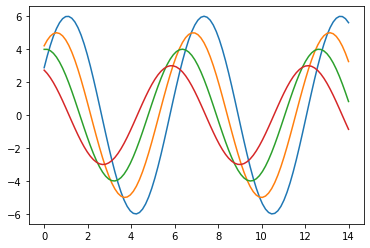

In [6]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 5):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        
sinplot()

### seaborn default 로 setting

- set() : alias of set_theme()

- 한 번에 여러 테마 매개 변수를 설정합니다.

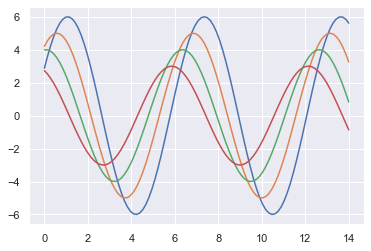

In [12]:
sns.set()
sinplot()

### seaborn 의 style 테마 

- Darkgrid : default  
- Whitegrid 
- Dark  
- White  
- Ticks

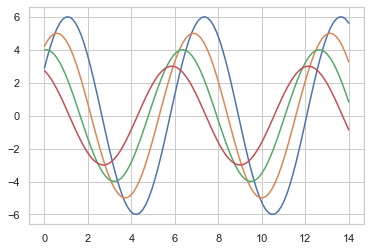

In [13]:
sns.set_style("whitegrid")
sinplot()

### axis 의 top, right spine 제거

- despine : Remove the top and right spines from plot(s).

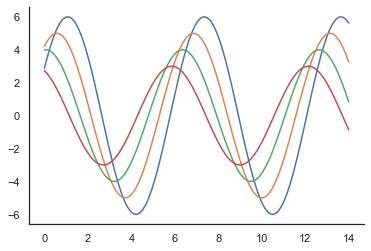

In [22]:
sns.set_style("white")
fig, ax = plt.subplots()
sns.despine()
sinplot()

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 2

* random walk data

In [31]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

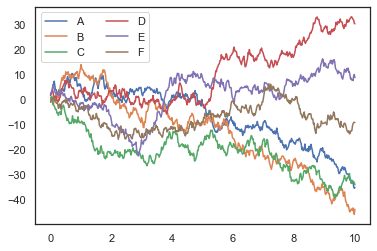

In [32]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

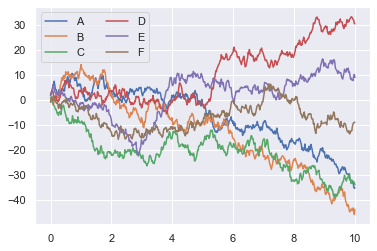

In [33]:
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 3

- tips dataset 에서 요일별 평균 팁 금액을 남, 녀 고객 별 비교


- bar(x, height, width=0.8)

In [59]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
tips.info() # day 가 category type 인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### matplotlib - bar chart

In [62]:
x = np.arange(len(tips['day'].cat.categories))
x

array([0, 1, 2, 3])

In [63]:
tip1 = tips[tips['sex'] == 'Male'].groupby('day').mean()['tip']
tip2 = tips[tips['sex'] == 'Female'].groupby('day').mean()['tip']

In [64]:
days = tips['day'].cat.categories
days

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

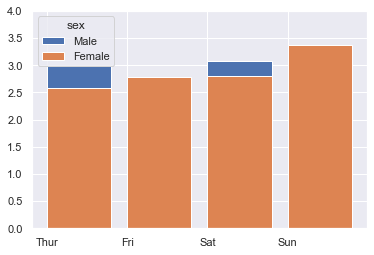

In [75]:
fig, ax = plt.subplots()
ax.bar(x, tip1, label='Male', tick_label=days, align='edge')
ax.bar(x, tip2, label='Female', align='edge')
ax.set_ylim([0, 4])
plt.legend(title="sex")

- bar 의 사각형 범위

$(x - width/2, x + width/2, bottom, bottom+height)$

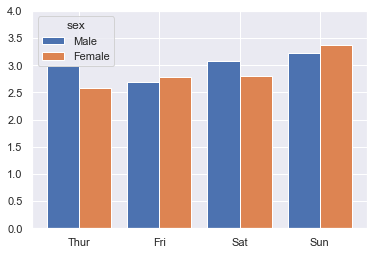

In [79]:
fig, ax = plt.subplots()
ax.bar(x, tip1, width=-0.4, label='Male', tick_label=days, align='edge')
ax.bar(x, tip2, width=0.4, label='Female', align='edge')
ax.set_ylim([0, 4])
plt.legend(title="sex")

### Seaborn - barplot

- 포인트 추정치 및 신뢰 구간을 직사각형 막대로 표시

<AxesSubplot:xlabel='day', ylabel='tip'>

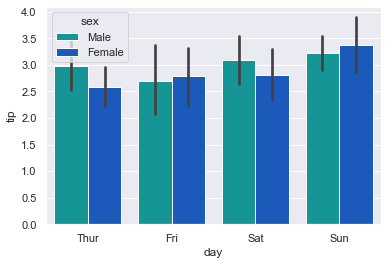

In [81]:
sns.barplot(x="day", y="tip", data=tips, hue="sex", palette="winter_r")

## 통계적 추론 (Statistical Estimation) 과 관련된 plot 들

- 전체 data 의 분포에 대한 plotting 

- 중심경향 추론(central tendency estimation) 에 사용되는 mean 과 median 에 관련된 plot 들

### boxplot - 범주와 관련된 분포를 표시하는 상자 그림

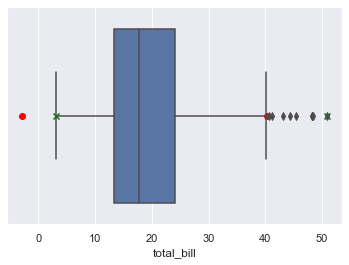

In [158]:
q1 = tips["total_bill"].quantile(0.25)
q3 = tips["total_bill"].quantile(0.75)
min_value = tips["total_bill"].min()
max_value = tips["total_bill"].max()
iqr = q3 - q1
limit_lower = q1 - 1.5*iqr
limit_upper = q3 + 1.5*iqr
ax = sns.boxplot(x=tips["total_bill"])
plt.scatter(limit_lower,0, color='red')
plt.scatter(limit_upper,0, color='red')
plt.scatter(min_value,0, color='green', marker='x')
plt.scatter(max_value,0, color='green', marker='x')
plt.show()

### Violine Plot

- box plot + kde (kernel density estimation) 을 하여 data 의 분포를 쉽게 파악할 수 있도록 한다.

- box plot 의 사분위수와 whisker 가 violin 내에 표시된다.  

- violin plot 이 kde 를 이용하므로 넓은 부분이 high density 이고, 좁은 부분이 low density 이다.  

- Box plot 의 사분위간 범위(Inter-Quartile range) 와 kde 의 higher density 부분이 같은 영역으로 일치한다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

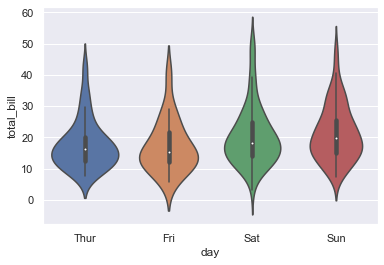

In [159]:
# 요일별 total bill 금액 분포
sns.violinplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

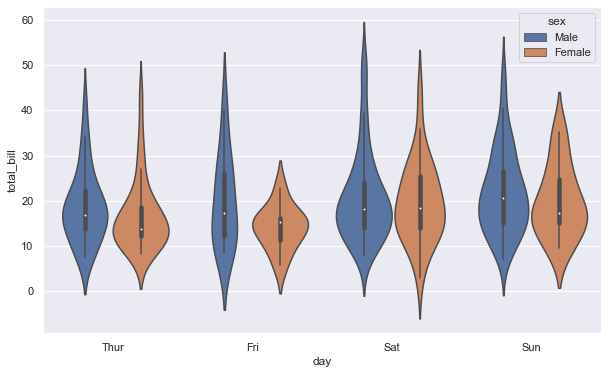

In [160]:
# 요일별 성별 total bill 분포
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips)

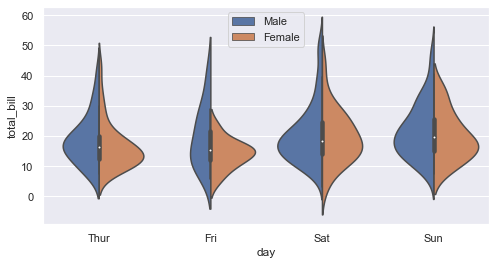

In [161]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True);
ax.legend(loc="upper center")

## 변수 한개 (Univariate) 의 분포를 그리는 기능

### Histogram

In [162]:
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

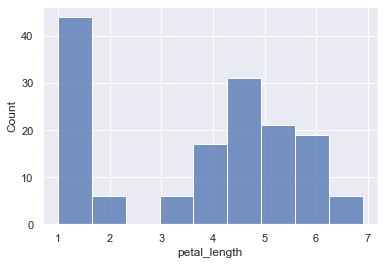

In [163]:
sns.histplot(df['petal_length'])

커널 밀도 추정 (KDE) 플롯은 히스토그램에 대한 분석인 데이터세트의 관측 값 분포를 시각화. KDE는 하나 이상의 차원에서 연속 확률 밀도 곡선을 사용하여 데이터를 나타냅니다.

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

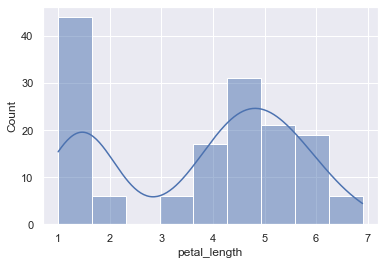

In [164]:
sns.histplot(df['petal_length'], kde=True)

## 변수두개(bivariate) 분포를 그리는 기능

### Histogram using Matplotlib

- multivariate_normal(mean, cov, size)  

In [165]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,-2.368179,-0.483153
1,0.455836,0.710911
2,0.801331,1.437575
3,-3.200683,-0.156880
4,3.236045,1.698817


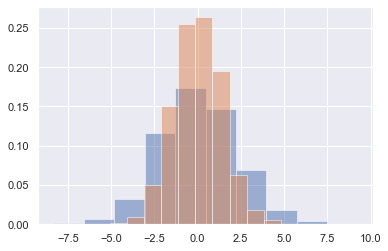

In [166]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

### kde plot using seaborn

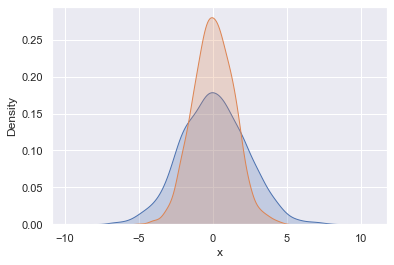

In [167]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

<AxesSubplot:xlabel='x', ylabel='Count'>

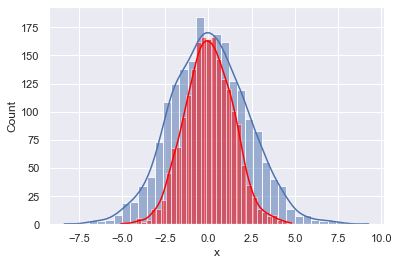

In [168]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True, color='red')

<AxesSubplot:xlabel='x', ylabel='y'>

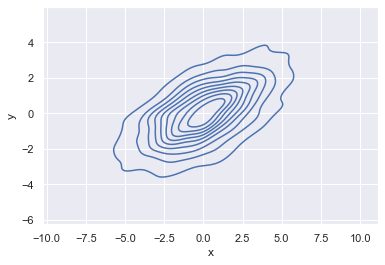

In [169]:
sns.kdeplot(x=data['x'], y=data['y'])

### jointplot()

### Joint Scatter Plot

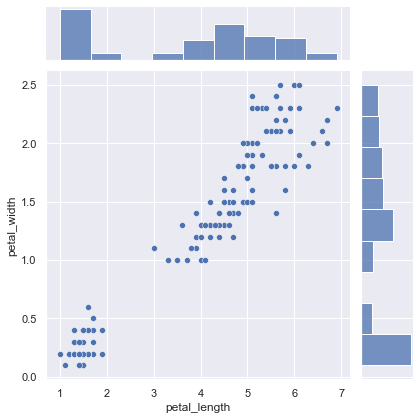

In [170]:
sns.jointplot(x='petal_length', y='petal_width', data=df);

### Hexbin Plot

- Hexaginal binning 은 data 밀도가 sparse 한 경우의 bivariate data 분석에 사용  
    ==> data 가 너무 퍼져있어서 scatter plot 으로 분석하기 어려운 경우 사용

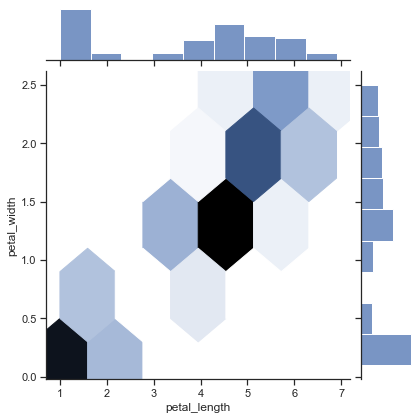

In [171]:
with sns.axes_style('ticks'):  #ticks, whitegrid, white
    sns.jointplot(x='petal_length', y='petal_width', data=df, kind='hex');

### Kernel Density Eestimation

- variable 의 분포를 보는 방법

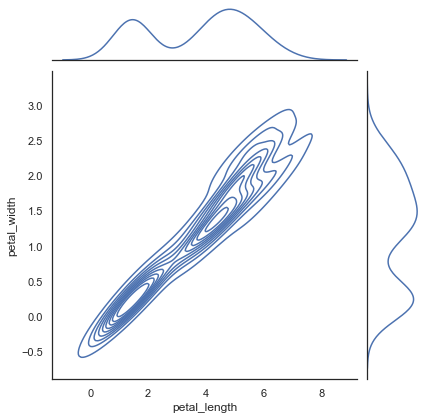

In [172]:
with sns.axes_style('white'):
    sns.jointplot(x='petal_length', y='petal_width', data=df, kind='kde')

### Pairwise Relationship

- 다변량 분석의 경우 각각의 변수를 짝지워 Bivariate Distribution 표시 - (n, 2) combination  

- sns.pairplot()

- hue : 색깔 구분을 할 변수  

- diag_kind : 대각선에 배치할 subplots (hist or kde)

In [173]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


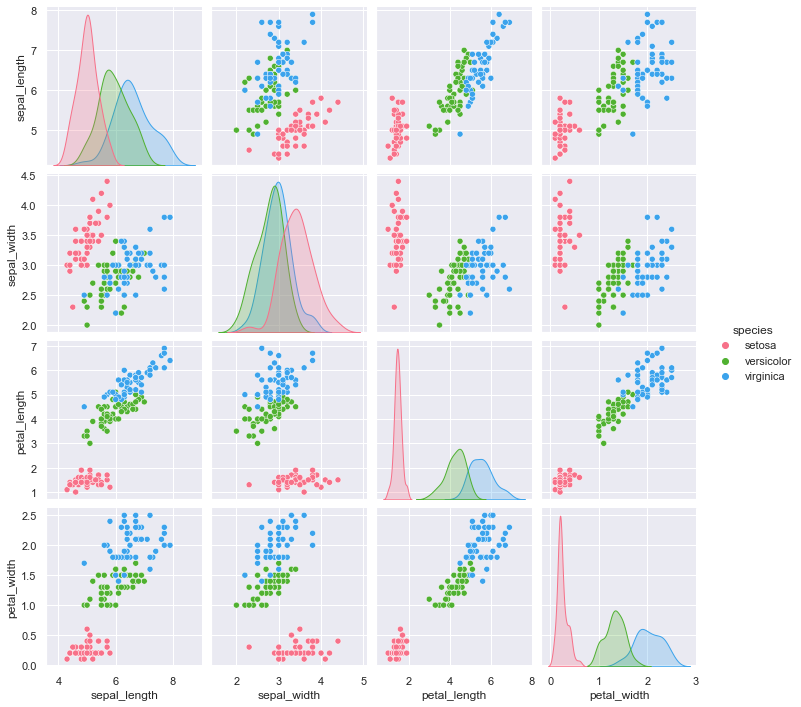

In [174]:
sns.pairplot(df, hue='species', diag_kind='kde', kind='scatter', palette='husl')

## Categorical Data plotting 

- 지금까지 위에서 그린 것은 연속된 값을 plot 한 것이므로, categorical variable 에는 적합하지 않음  

### stripplot : 하나의 변수가 범주형인 산점도

<AxesSubplot:xlabel='species', ylabel='petal_length'>

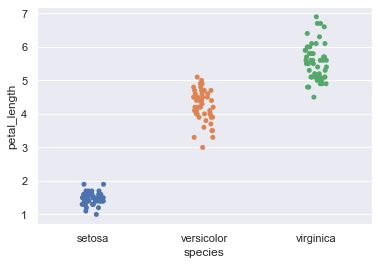

In [175]:
sns.stripplot(x='species', y='petal_length', data=df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

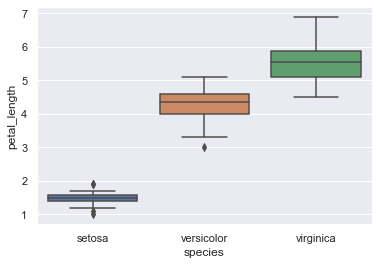

In [176]:
sns.boxplot(x='species', y='petal_length', data=df)

## 기타

- Bar Plot  : bar 길이가 비율을 표시  
- Count Plot : y 축 variable 의 observation 수
- Point Plot : bar plot 과 같은 의미를 다른 style 로 표시. 서로 다른 높이의 point 로 표시

In [205]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### barplot

- 포인트 추정치 및 신뢰 구간을 직사각형 막대로 표시합니다. 

- 타이타닉호 남녀 성별 객실 등급별 생존 확률 표시

<AxesSubplot:xlabel='sex', ylabel='survived'>

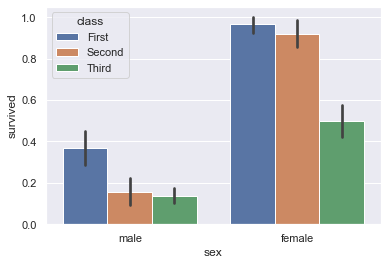

In [178]:
sns.barplot(x='sex', y='survived', hue="class", data=df)

### countplot

- 막대를 사용하여 각 범주형 bin의 관측치 수를 표시합니다.  

- 타이타닉호 객실 등급별 생존 sample 수 표시

<AxesSubplot:xlabel='class', ylabel='count'>

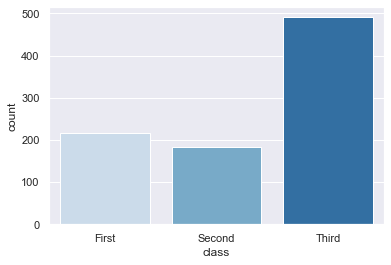

In [181]:
sns.countplot(x='class', data=df, palette="Blues")

### pointplot

- 포인트 플롯은 산점도 포인트의 위치에 따른 숫자 변수의 중심 경향 추정치를 나타내며 오차 막대를 사용하여 해당 추정치 주변의 불확실성에 대한 일부 표시를 제공합니다.

- 타이타닉호 남녀 성별, class 별 생존 확률의 변화 표시

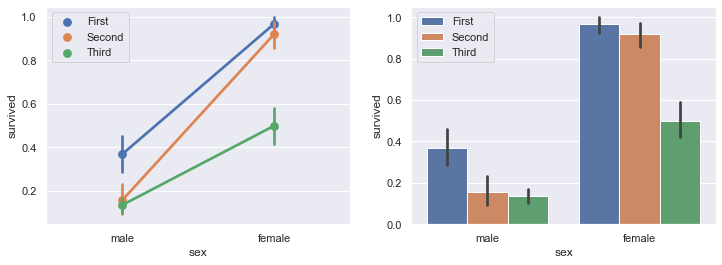

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.pointplot(x='sex', y='survived', hue="class", data=df, ax=ax1);
ax1.legend(loc="upper left")
# poitplot 과 비교
sns.barplot(x='sex', y='survived', hue="class", data=df, ax=ax2);
ax2.legend(loc="upper left")
plt.show()

## Wide Form 의 Data 표시

- 대부분의 경우 세로로 길거나 tidy 한 dataset 이 선호되지만 가로로 긴 wide-form dataset 의 경우 지금까지와 같은 plot 을 세로로 표시

<AxesSubplot:>

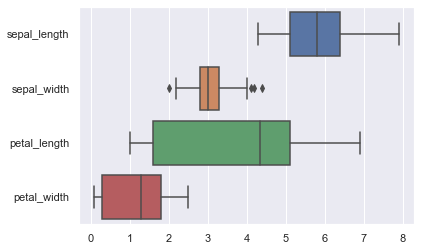

In [194]:
df = sns.load_dataset("iris")
sns.boxplot(data=df, orient="h")

<AxesSubplot:>

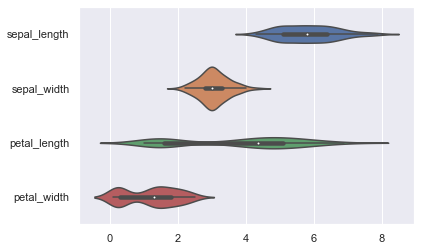

In [195]:
sns.violinplot(data=df, orient="h")

## Linear Relationship

- regplot  
    - regplot ()은 단순 선형 회귀 모델 피팅 및 플롯을 수행합니다. 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

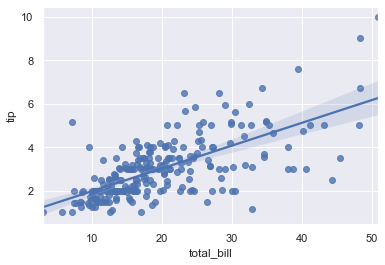

In [250]:
sns.regplot(x="total_bill", y="tip", data=tips)   # 연속형 변수

- color, marker 종류, 크기 조절

Text(0.5, 1.0, 'Linear Regresson Plot')

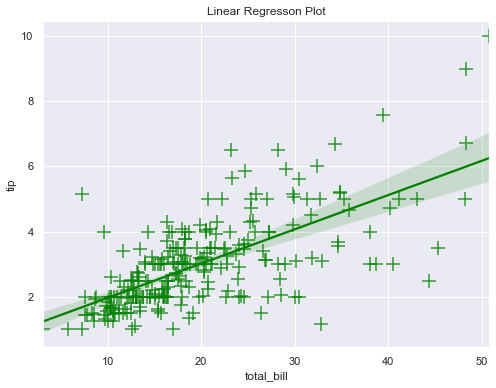

In [251]:
plt.figure(figsize=(8, 6))
ax = sns.regplot(x="total_bill", y="tip", data=tips, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='total_bill', ylabel='tip') # add x- and y-labels
ax.set_title('Linear Regresson Plot') # add title

## Facet Grid

- data 의 subset 으로 histogram 을 그려 비교하는 것을 매우 쉽게 할 수 있다.


- 이산형 변수를 기준으로 row, col, hue 의 3 차원 구조를 형성.


- FacetGrid.map() 함수를 이용하여 실제 시각화


- row, col, hues : trings
    - 데이터의 하위 집합을 정의하는 변수로, 그리드의 개별 facet에 그려집니다.

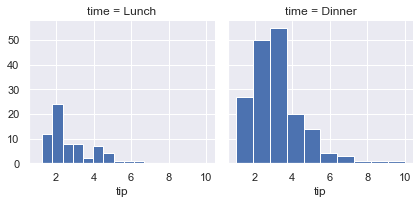

In [252]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

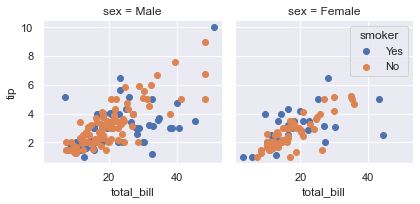

In [265]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, "total_bill", "tip")
plt.legend(title='smoker')

In [266]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


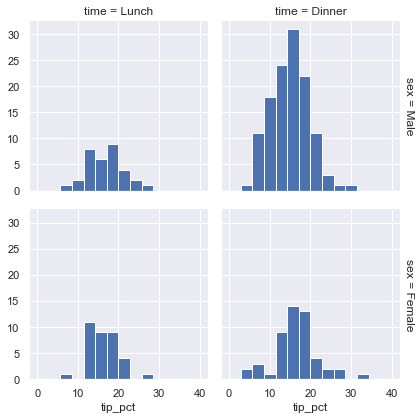

In [268]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

## Pair Grid

- FacetGrid 와 차이점은 각 subplot 마다 다른 pair 의 변수를 사용한다는 것과 matrix 구조을 이루는 것


- 사용법은 FacetGrid 와 같다. gid 를 초기화 하고 plot 함수를 pass 시킨다.

In [269]:
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


전체 pair 를 scatter plot 으로 그린다.

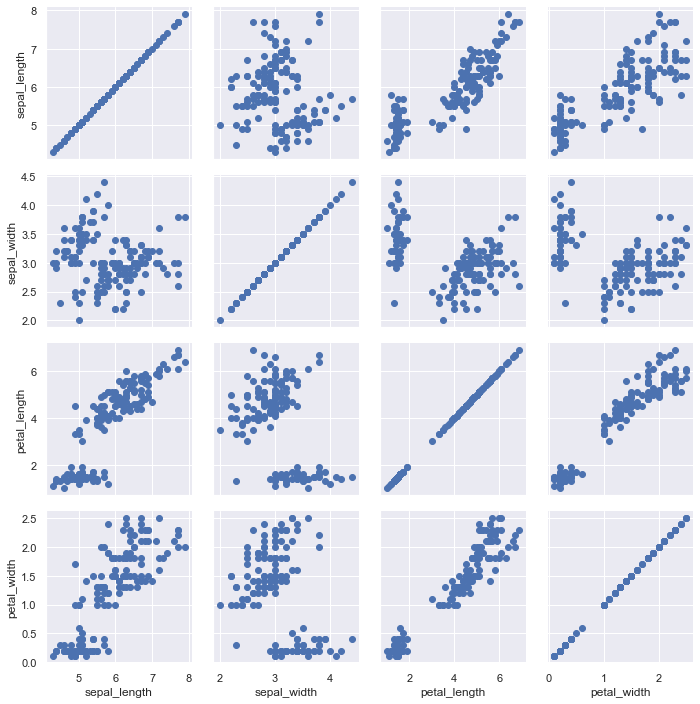

In [270]:
g = sns.PairGrid(df)
g.map(plt.scatter) 

다른 함수를 이용하여 대각선에 각 column 의 univariate distribution 을 표시할 수도 있다.  

ex) 대각선은 histogram. 대각선 외에는 scatter plot 을 그리는 경우

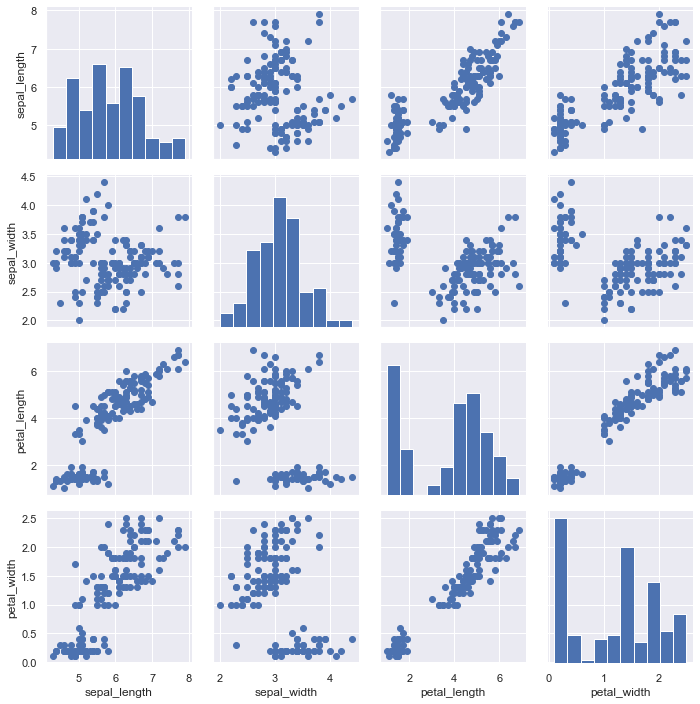

In [274]:
g = sns.PairGrid(df)

g.map_diag(plt.hist)

g.map_offdiag(plt.scatter)

hue parameter 에 species column 을 지정하면 한 pair plot 에 3 차원 정보 표현

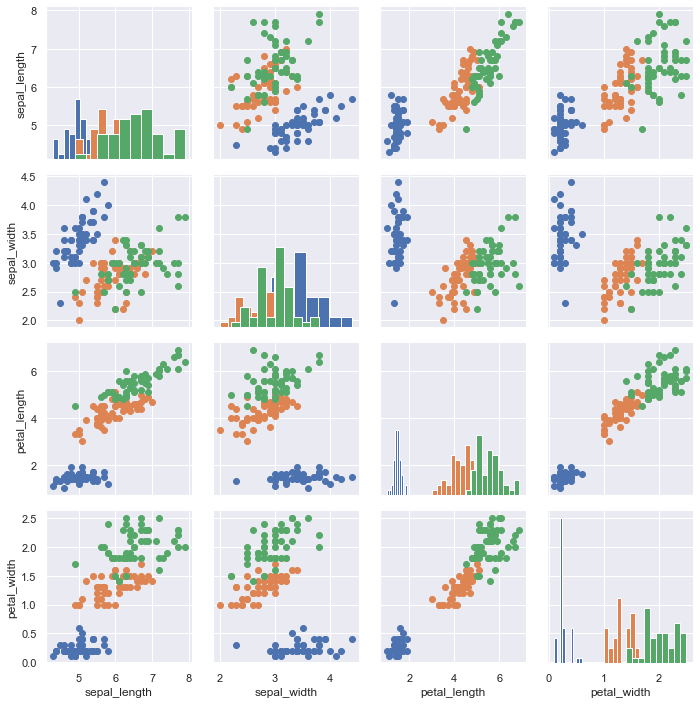

In [275]:
g = sns.PairGrid(df, hue="species")

g.map_diag(plt.hist)

g.map_offdiag(plt.scatter)

matrix 의 상삼각(map_upper)과 하삼각(map_lower)에 각각 다른 함수를 적용할 수도 있다.

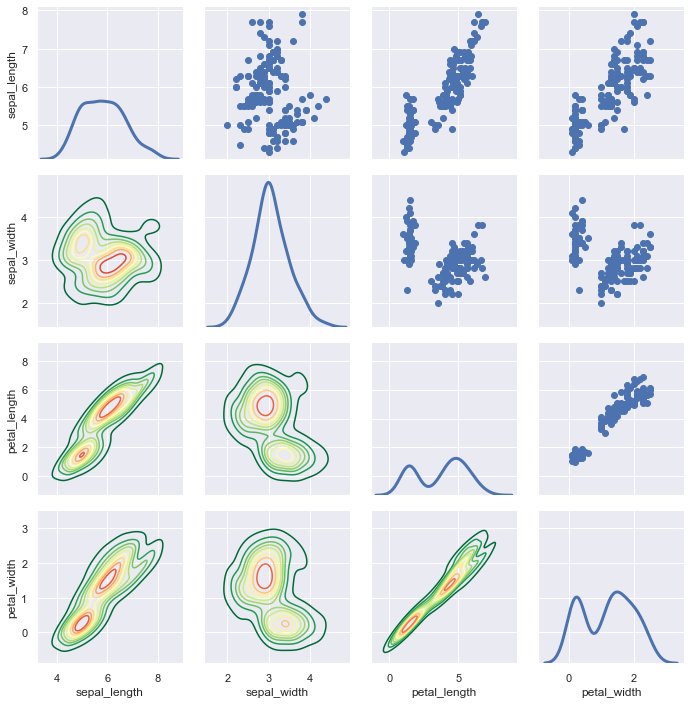

In [276]:
g = sns.PairGrid(df)

g.map_upper(plt.scatter)

g.map_lower(sns.kdeplot, cmap="RdYlGn_r")

g.map_diag(sns.kdeplot, lw=3)

- heatmap

<AxesSubplot:>

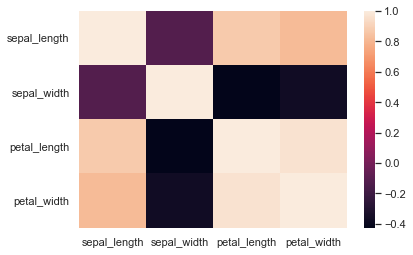

In [278]:
corr = df.corr()

sns.heatmap(corr)